c:\Users\Juice_Lover\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


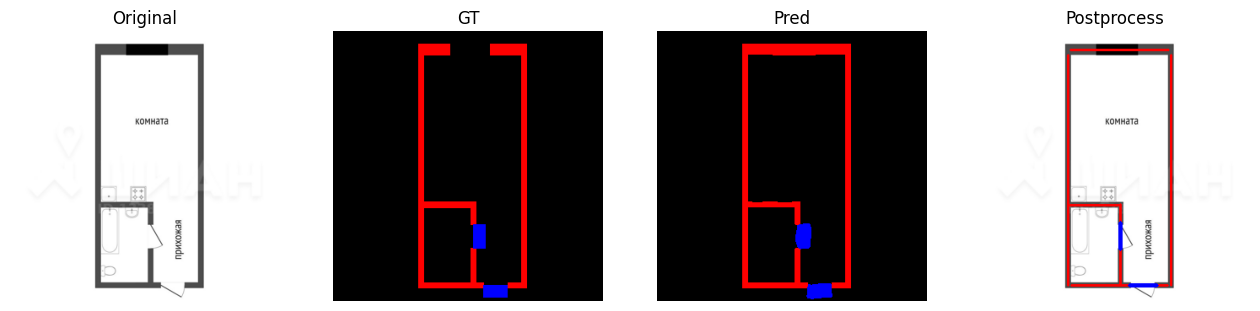

{
  "meta": {
    "source": "examples\\test_1.png"
  },
  "walls": [
    {
      "id": "w1",
      "points": [
        [
          107,
          22
        ],
        [
          223,
          22
        ]
      ]
    },
    {
      "id": "w2",
      "points": [
        [
          106,
          206
        ],
        [
          165,
          206
        ]
      ]
    },
    {
      "id": "w3",
      "points": [
        [
          108,
          301
        ],
        [
          176,
          301
        ]
      ]
    },
    {
      "id": "w4",
      "points": [
        [
          210,
          301
        ],
        [
          222,
          301
        ]
      ]
    },
    {
      "id": "w5",
      "points": [
        [
          104,
          28
        ],
        [
          104,
          301
        ]
      ]
    },
    {
      "id": "w6",
      "points": [
        [
          166,
          259
        ],
        [
          166,
          299
        ]
      ]
    }

In [4]:
import json
import torch
import numpy as np
from PIL import Image
from torchvision.transforms import v2
from torchvision.transforms.functional import InterpolationMode

import utils
import postprocess
from model import UNetPP

img_path = r'examples\test_1.png'
mask_path = r'examples/anot_1.png'
weights_path = 'best_model.pth'

mean = 0.8954244
std = 0.23227668

img_transform = v2.Compose([
    v2.Resize((320, 320)),
    v2.ToTensor(),
    v2.Normalize(mean=[mean], std=[std]),
])

mask_transform = v2.Compose([
    v2.Resize((320, 320), interpolation=InterpolationMode.NEAREST),
])

device = (
    'cuda' if torch.cuda.is_available()
    else 'mps' if torch.backends.mps.is_available()
    else 'cpu'
)

img = Image.open(img_path).convert('L')
mask = Image.open(mask_path).convert('L')

img_resized = img.resize((320, 320))
gt = np.array(mask_transform(mask), dtype=np.int64)

img_t = img_transform(img).unsqueeze(0).to(device)
model = UNetPP(in_channels=1, num_classes=4).to(device)
state = torch.load(weights_path, map_location=device)
model.load_state_dict(state)
model.eval()

with torch.no_grad():
    logits = model(img_t)
    pred = torch.argmax(logits, dim=1)[0].cpu().numpy()

json_data = postprocess.build_json(pred, image_name=img_path)

gt_rgb = utils.mask_to_rgb(gt)
pred_rgb = utils.mask_to_rgb(pred)
postprocess.visualize_pipeline(np.array(img_resized), gt_rgb, pred_rgb, json_data)

print(json.dumps(json_data, indent=2))


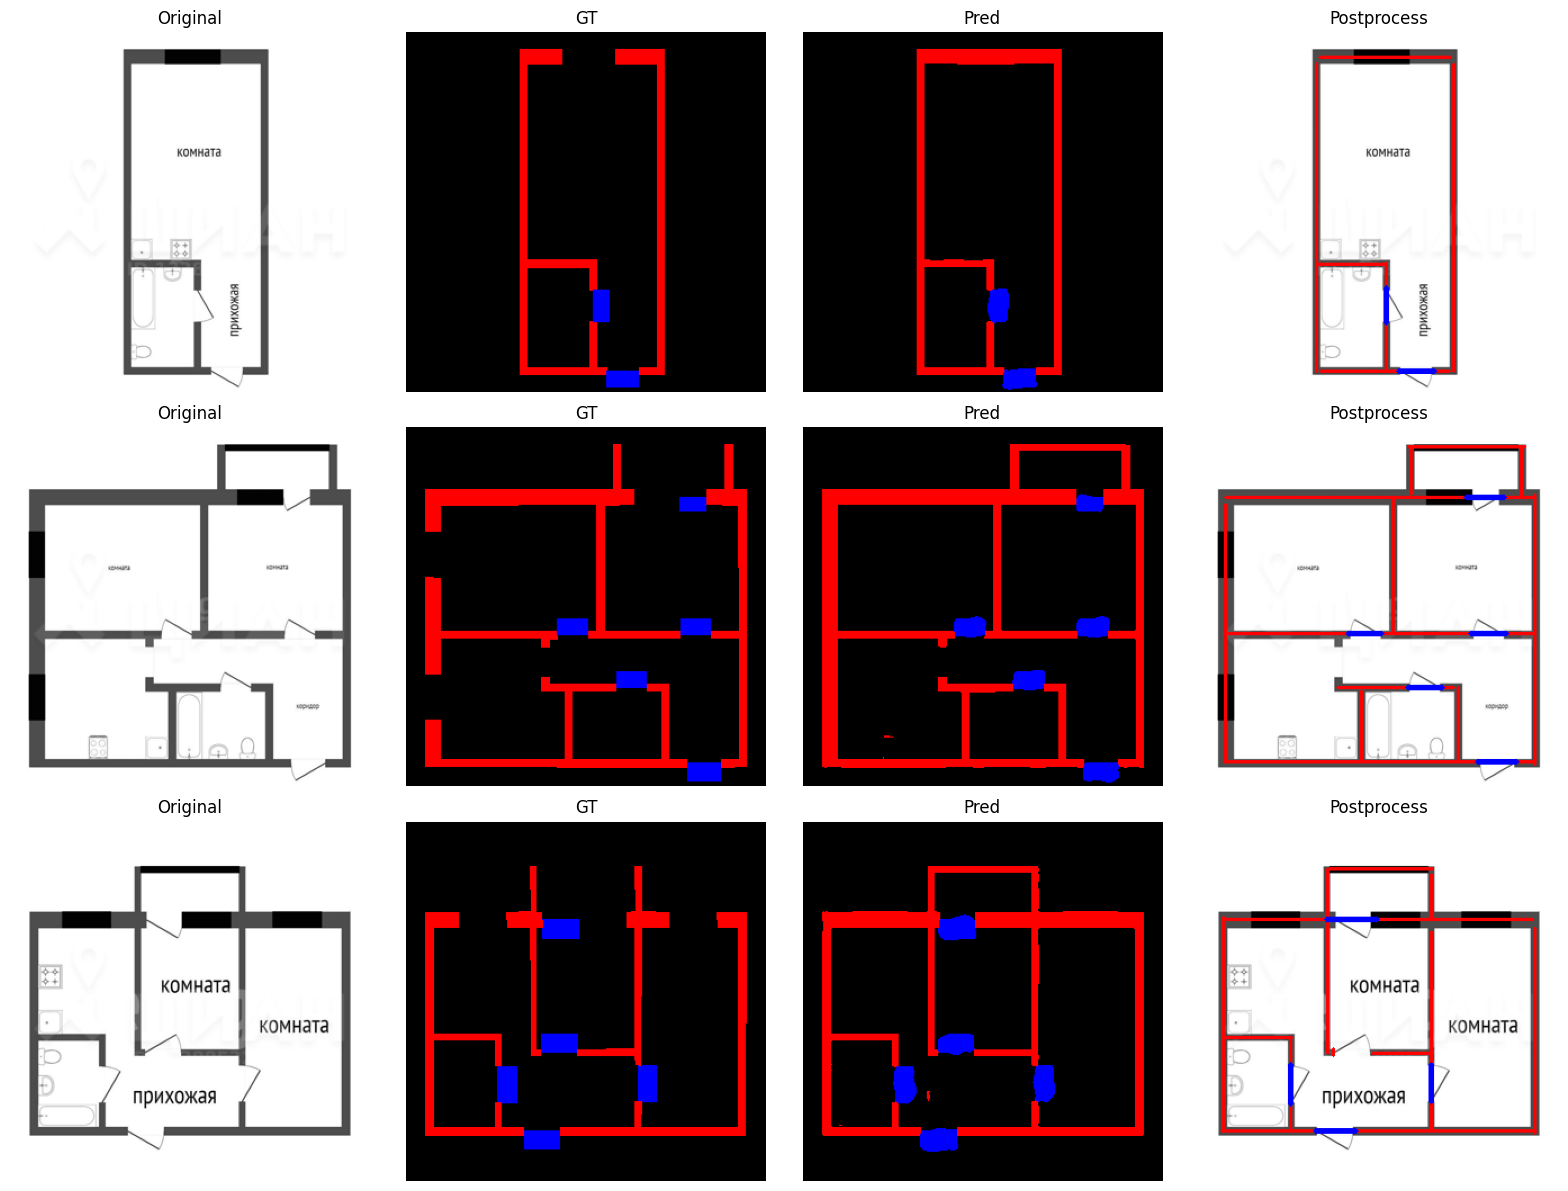

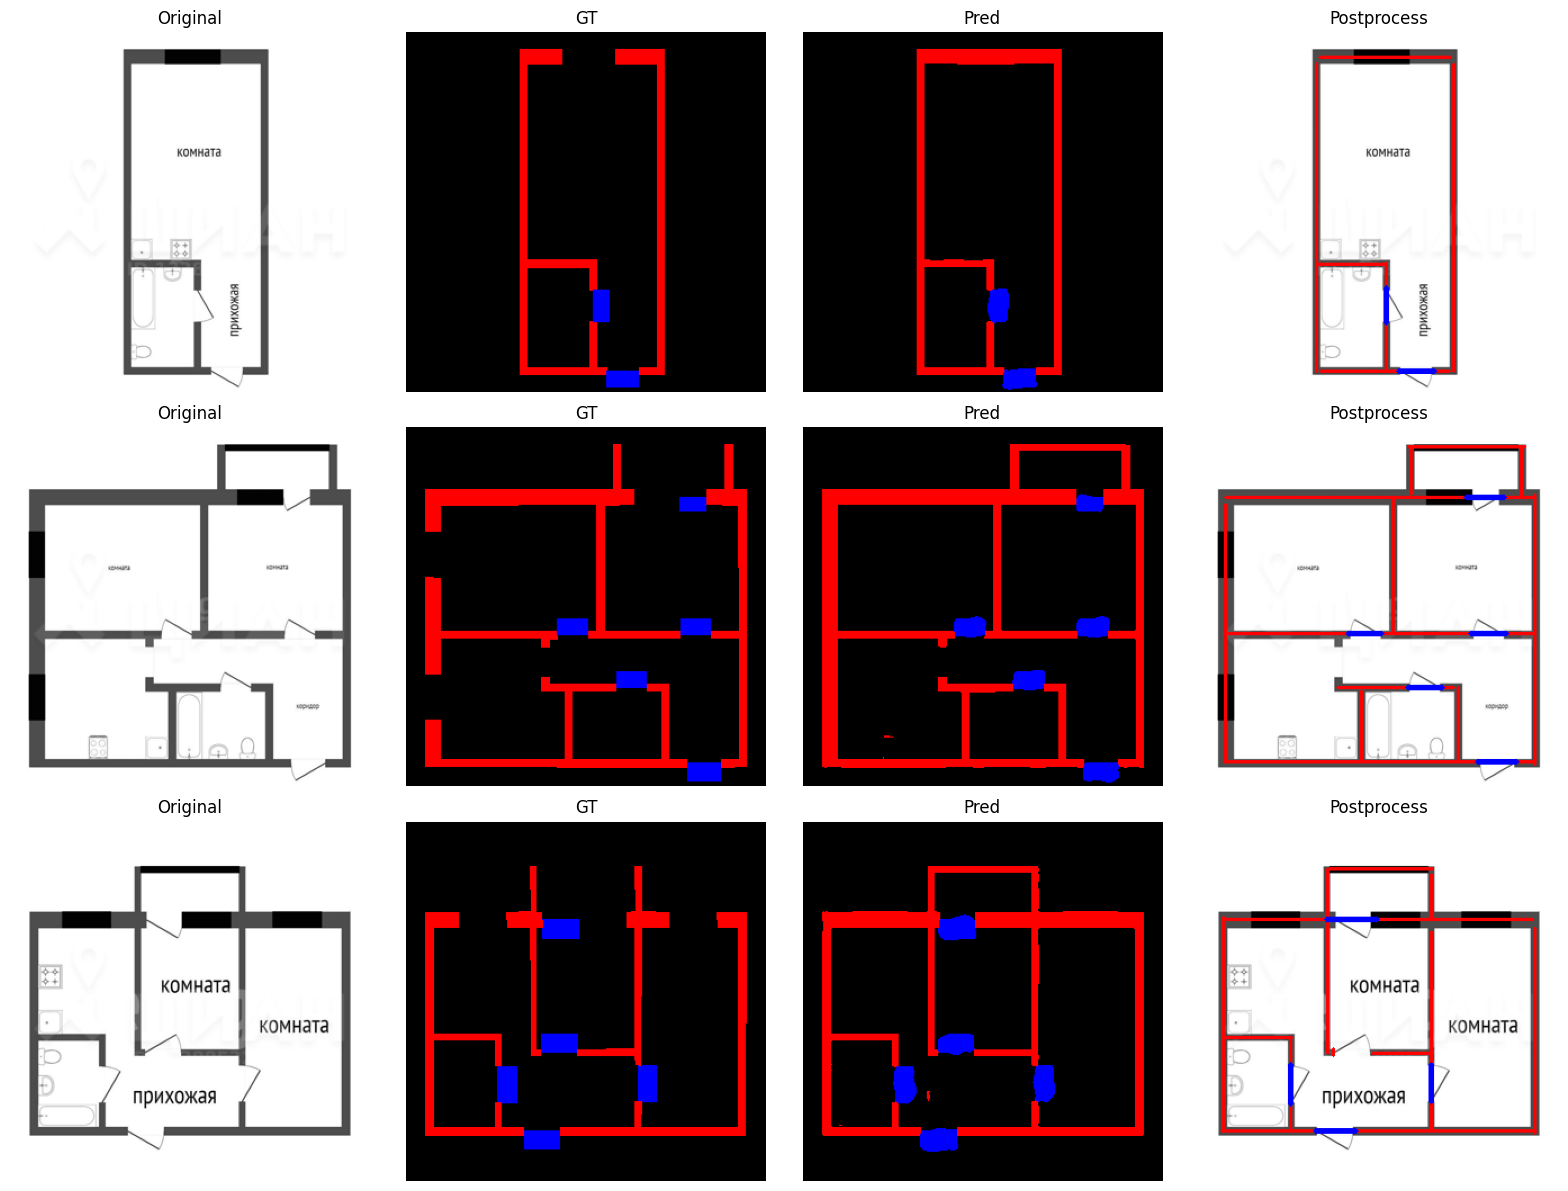

In [5]:
import torch
import numpy as np
from PIL import Image
from torchvision.transforms import v2
from torchvision.transforms.functional import InterpolationMode
import utils, postprocess
from model import UNetPP

img_paths = ["examples/test_1.png", "examples/test_2.png","examples/test_3.png"]
mask_paths = ["examples/anot_1.png", "examples/anot_2.png","examples/anot_3.png"]
weights_path = "best_model.pth"

mean, std = 0.8954244, 0.23227668
img_transform = v2.Compose([
    v2.Resize((320, 320)),
    v2.ToTensor(),
    v2.Normalize(mean=[mean], std=[std]),
])
mask_transform = v2.Compose([
    v2.Resize((320, 320), interpolation=InterpolationMode.NEAREST),
])

device = "cuda" if torch.cuda.is_available() else "cpu"
model = UNetPP(in_channels=1, num_classes=4).to(device)
model.load_state_dict(torch.load(weights_path, map_location=device))
model.eval()

samples = []
for img_path, mask_path in zip(img_paths, mask_paths):
    img = Image.open(img_path).convert("L")
    mask = Image.open(mask_path).convert("L")

    img_resized = img.resize((320, 320))
    gt = np.array(mask_transform(mask), dtype=np.int64)

    img_t = img_transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        pred = torch.argmax(model(img_t), dim=1)[0].cpu().numpy()

    json_data = postprocess.build_json(pred, image_name=img_path)
    gt_rgb = utils.mask_to_rgb(gt)
    pred_rgb = utils.mask_to_rgb(pred)

    samples.append((np.array(img_resized), gt_rgb, pred_rgb, json_data))

postprocess.visualize_batch(samples, save_path="stack.png")


Пример json

In [6]:
print(json.dumps(json_data, indent=2))

{
  "meta": {
    "source": "examples/test_3.png"
  },
  "walls": [
    {
      "id": "w1",
      "points": [
        [
          116,
          42
        ],
        [
          207,
          42
        ]
      ]
    },
    {
      "id": "w2",
      "points": [
        [
          159,
          87
        ],
        [
          296,
          87
        ]
      ]
    },
    {
      "id": "w3",
      "points": [
        [
          23,
          87
        ],
        [
          112,
          87
        ]
      ]
    },
    {
      "id": "w4",
      "points": [
        [
          22,
          192
        ],
        [
          82,
          192
        ]
      ]
    },
    {
      "id": "w5",
      "points": [
        [
          154,
          206
        ],
        [
          204,
          206
        ]
      ]
    },
    {
      "id": "w6",
      "points": [
        [
          140,
          275
        ],
        [
          299,
          275
        ]
      ]
    },
    {